In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted


In [2]:
#historical_join_db = pd.read_excel('./resource/historical_join_db3_new.xlsx')
historical_join_db = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_join_db.xlsx', keep_default_na=False)
historical_join_db

,Databases,Primary Model,Second Model,Model,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,...,wire,wiremock,xabber-android,yacy_search_server,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
0,Aerospike,Key-value,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ArangoDB,Multi-Model,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cassandra,Wide column,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,8,8,0,0
3,ClickHouse,Relational,Multi-model,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Couchbase,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CouchDB,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,DynamoDB,Multi-model,,NoSQL,0,0,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0
7,Etcd,Key-value,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,FileMaker,Relational,,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Firebase Realtime,Document,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
result_databases_models = historical_join_db
result_databases_models

,Databases,Primary Model,Second Model,Model,Activiti,AmazeFileManager,Android-IMSI-Catcher-Detector,Anki-Android,AntennaPod,AnySoftKeyboard,...,wire,wiremock,xabber-android,yacy_search_server,zaproxy,zeebe,zeppelin,zipkin,zookeeper,zotfile
0,Aerospike,Key-value,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ArangoDB,Multi-Model,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cassandra,Wide column,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,8,8,0,0
3,ClickHouse,Relational,Multi-model,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Couchbase,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CouchDB,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,DynamoDB,Multi-model,,NoSQL,0,0,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0
7,Etcd,Key-value,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,FileMaker,Relational,,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Firebase Realtime,Document,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
organizing_per_model = result_databases_models.groupby(['Model']).sum()
organizing_per_model = organizing_per_model.mask(organizing_per_model > 0, True)
organizing_per_model = organizing_per_model.mask(organizing_per_model == 0, False)
organizing_per_model = organizing_per_model.transpose()
#organizing_per_model = organizing_per_model.drop('Projects', axis = 0)
organizing_per_model

Model,NoSQL,SQL
Activiti,True,True
AmazeFileManager,False,False
Android-IMSI-Catcher-Detector,True,False
Anki-Android,True,False
AntennaPod,False,False
...,...,...
zeebe,True,True
zeppelin,True,True
zipkin,True,True
zookeeper,False,True


In [5]:
relational = pd.DataFrame(data = organizing_per_model.SQL)
nonRelational = pd.DataFrame(data = organizing_per_model.NoSQL)
relational.reset_index(inplace=True)
nonRelational.reset_index(inplace=True)

relational = relational.rename(columns={'index' : 'Projects'})
nonRelational = nonRelational.rename(columns={'index' : 'Projects'})

In [6]:
models_of_database_per_project = pd.merge(relational, nonRelational, left_on='Projects', right_on='Projects')

def identify_model (row):
    if (row['SQL'] and row['NoSQL']):
        return 'Multi-Model'
    else:
        if(row['SQL']):
            return 'Relational'
        if(row['NoSQL']):
            return 'NoSQL'

models_of_database_per_project['Model'] = models_of_database_per_project.apply(lambda row: identify_model(row), axis= 1)


models_of_database_per_project[models_of_database_per_project['Model'].isnull()]
models_of_database_per_project.dropna(subset=['Model'], inplace= True)
models_of_database_per_project.to_excel('modelsTeste.xlsx')

In [7]:
#annotated_java = pd.read_excel('./resources/annotated_java.xlsx')
annotated_java = pd.read_excel(RESOURCE_DIR + os.sep + 'annotated_java.xlsx', keep_default_na=False)
characterization_of_projects = pd.merge(models_of_database_per_project, annotated_java, left_on= 'Projects', right_on='name')
characterization_of_projects.drop(characterization_of_projects.index[33], inplace= True)
characterization_of_projects

,Projects,SQL,NoSQL,Model,owner,name,createdAt,pushedAt,isMirror,diskUsage,...,commits,pullRequests,branches,tags,releases,url,isSoftware,discardReason,domain,description
0,Activiti,True,True,Multi-Model,Activiti,Activiti,2012-09-13 11:34:43,2019-08-23 12:02:11,False,95935,...,8458,1411,74,263,23,http://www.github.com/Activiti/Activiti,Y,,automation,Activiti is a light-weight workflow and Busine...
1,Android-IMSI-Catcher-Detector,False,True,NoSQL,CellularPrivacy,Android-IMSI-Catcher-Detector,2013-11-23 10:04:14,2019-08-13 15:22:57,False,10897,...,2583,344,6,49,48,http://www.github.com/CellularPrivacy/Android-...,Y,,monitoring,"AIMSICD • Fight IMSI-Catcher, StingRay and sil..."
2,Anki-Android,False,True,NoSQL,ankidroid,Anki-Android,2013-01-20 13:55:53,2019-08-22 12:52:01,False,111469,...,9105,1609,3,691,634,http://www.github.com/ankidroid/Anki-Android,Y,,media,AnkiDroid: Anki on Android
3,Arduino,True,False,Relational,arduino,Arduino,2010-09-17 19:10:36,2019-08-22 07:51:41,False,1369943,...,7107,1343,4,81,27,http://www.github.com/arduino/Arduino,Y,,operating system,open-source electronics prototyping platform
4,AsciidocFX,True,True,Multi-Model,asciidocfx,AsciidocFX,2014-05-18 17:49:13,2019-08-05 22:55:08,False,145073,...,1566,53,29,73,73,http://www.github.com/asciidocfx/AsciidocFX,Y,,media,Asciidoc Editor and Toolchain written with Jav...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,zaproxy,True,False,Relational,zaproxy,zaproxy,2015-06-03 16:55:01,2019-08-22 07:24:00,False,181083,...,6980,2103,3,227,124,http://www.github.com/zaproxy/zaproxy,Y,,security,The OWASP ZAP core project
193,zeebe,True,True,Multi-Model,camunda-cloud,zeebe,2016-03-20 03:38:04,2021-03-27 12:19:51,False,86228,...,9798,3021,85,112,84,http://www.github.com/camunda-cloud/zeebe,Y,,automation,Distributed Workflow Engine for Microservices ...
194,zeppelin,True,True,Multi-Model,apache,zeppelin,2015-03-25 07:00:06,2019-08-23 08:18:53,True,75180,...,4154,3429,11,15,0,http://www.github.com/apache/zeppelin,Y,,collaboration,Mirror of Apache Zeppelin
195,zipkin,True,True,Multi-Model,openzipkin,zipkin,2012-06-06 18:26:16,2019-08-23 11:36:31,False,48583,...,2134,1728,41,184,53,http://www.github.com/openzipkin/zipkin,Y,,monitoring,Zipkin is a distributed tracing system


In [8]:
characterization_of_projects['domain'].value_counts()

software development         39
infrastructure management    33
media                        18
monitoring                   15
hpc                          13
program analysis             12
communication                10
machine learning              9
security                      9
game                          8
network                       7
automation                    6
application container         4
collaboration                 3
file management               3
scm                           2
gestão pessoal                1
cryptocurrency                1
operating system              1
erp                           1
e-commerce                    1
Name: domain, dtype: int64

Text(0.5, 1.0, 'Mean languages for each database model')

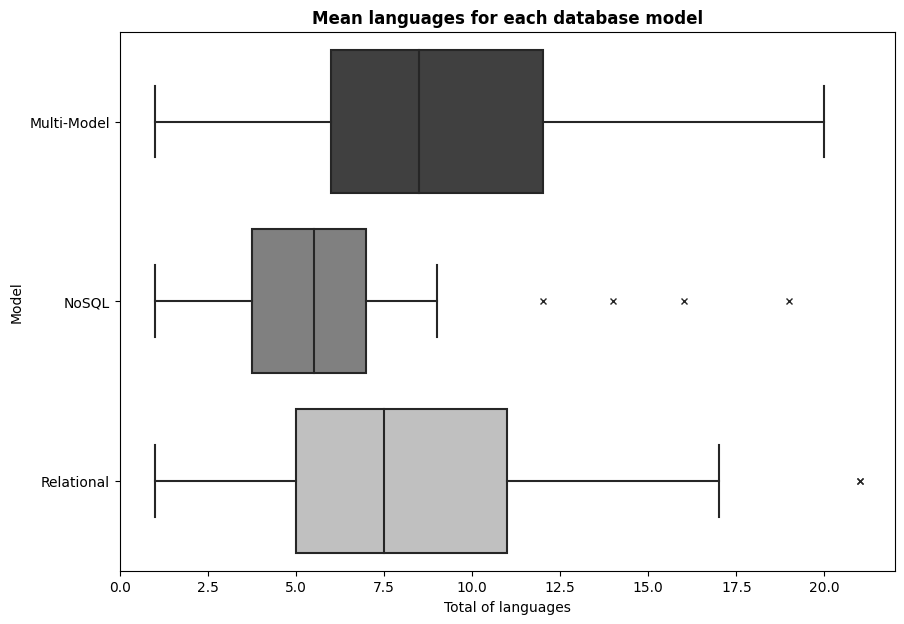

In [9]:
plt.figure(figsize=(10,7))
languages = characterization_of_projects[['Projects', 'Model', 'languages']]
valor = languages['languages']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
languages = languages[interval]
languages_graph = sns.boxplot(data=languages, x = "languages", y = "Model", palette = 'gray', flierprops = {'marker': 'x'})
languages_graph.set_xlabel('Total of languages')
languages_graph.set_title('Mean languages for each database model', fontweight = 'bold')

Text(0.5, 1.0, 'Mean diskUsage for each database model')

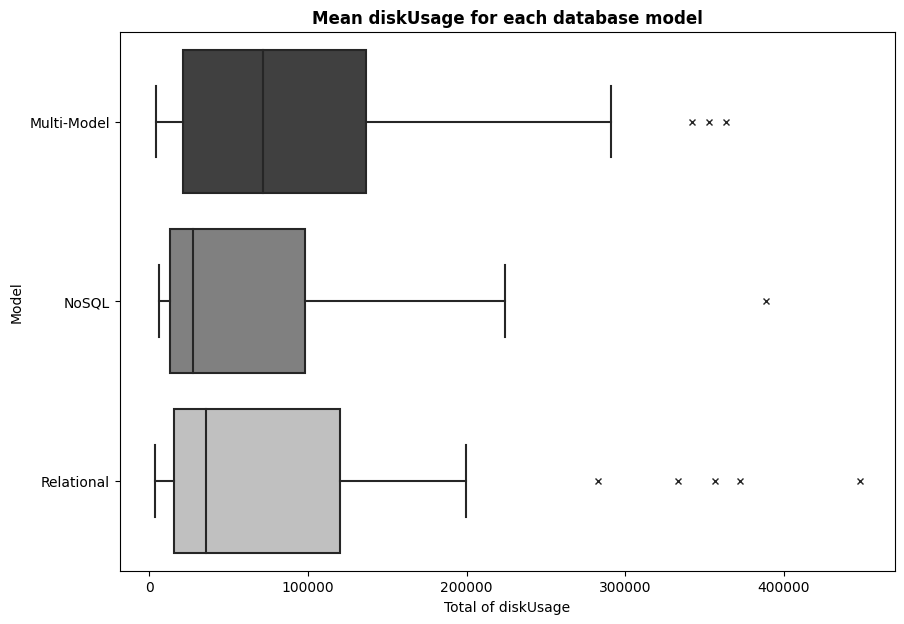

In [10]:
plt.figure(figsize=(10,7))
diskUsage = characterization_of_projects[['Projects', 'Model', 'diskUsage']]
valor = diskUsage['diskUsage']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
diskUsage = diskUsage[interval]
diskUsage_graph = sns.boxplot(data=diskUsage, x = "diskUsage", y = "Model", palette = 'gray', flierprops = {'marker': 'x'})
diskUsage_graph.set_xlabel('Total of diskUsage')
diskUsage_graph.set_title('Mean diskUsage for each database model', fontweight = 'bold')

Text(0.5, 1.0, 'Mean contributors for each database model')

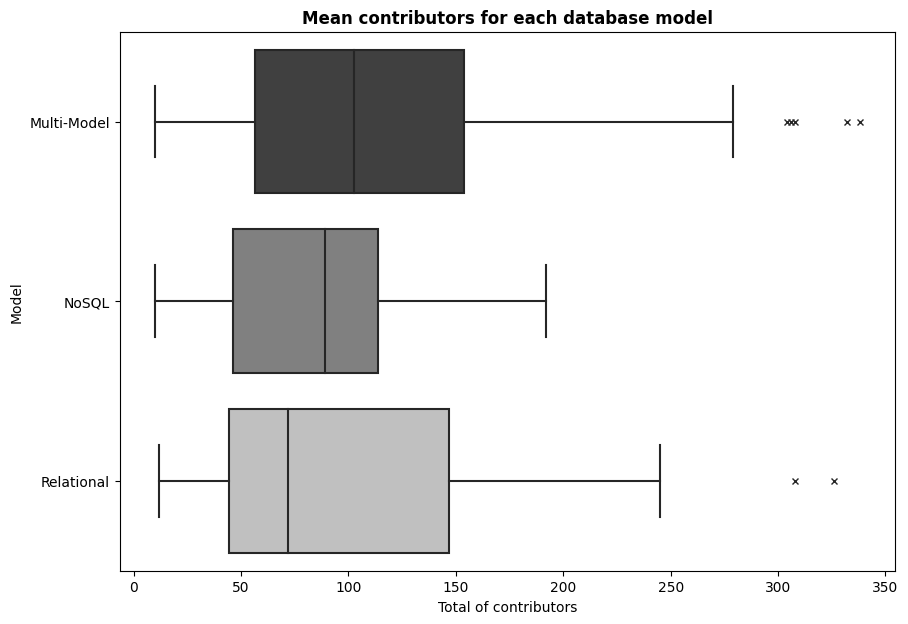

In [11]:
plt.figure(figsize=(10,7))
contributors = characterization_of_projects[['Projects', 'Model', 'contributors']]
valor = contributors['contributors']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
contributors = contributors[interval]
contributors_graph = sns.boxplot(data=contributors, x = "contributors", y = "Model", palette = 'gray',flierprops = {'marker': 'x'})
contributors_graph.set_xlabel('Total of contributors')
contributors_graph.set_title('Mean contributors for each database model', fontweight = 'bold')

Text(0.5, 1.0, 'Mean stars for each database model')

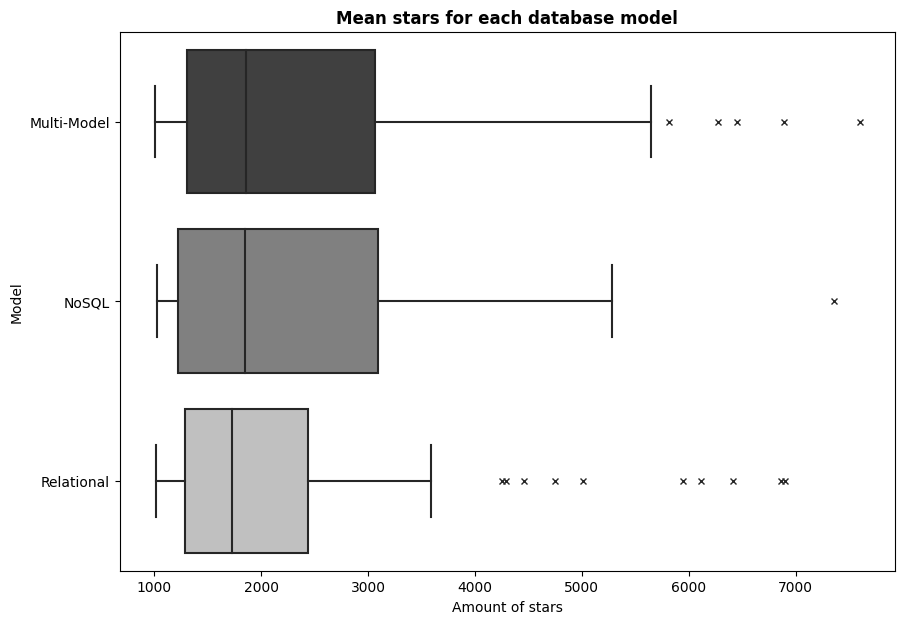

In [12]:
plt.figure(figsize=(10,7))
stars = characterization_of_projects[['Projects', 'Model', 'stargazers']]
valor = stars['stargazers']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
stars = stars[interval]
stars_graph = sns.boxplot(data = stars, x = "stargazers", y = "Model", palette='gray', flierprops = {'marker': 'x'})
stars_graph.set_xlabel('Amount of stars')
stars_graph.set_title('Mean stars for each database model', fontweight = 'bold')

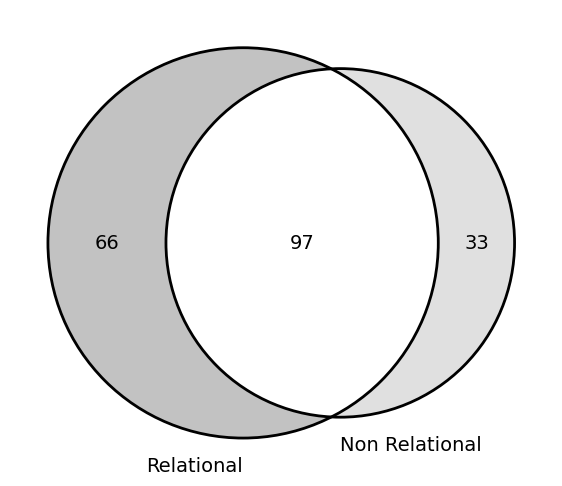

In [13]:
plt.figure(figsize=(7,7))
count_of_models = characterization_of_projects['Model'].value_counts()
A = count_of_models['Relational']
B = count_of_models['NoSQL']
AB = count_of_models['Multi-Model']

venn = venn2(subsets = (A, B, AB), set_labels=('Relational', 'Non Relational'), set_colors=('darkgray', 'lightgray'), alpha= 0.7)
venn2_circles(subsets=(A, B, AB))

for text in venn.set_labels:  #change label size
 text.set_fontsize(14);
for text in venn.subset_labels:  #change number size
 text.set_fontsize(14)

plt.savefig(IMAGES_DIR+"/fig10.pdf", format="pdf", bbox_inches="tight")
#plt.title("Venn diagram to represent the adoption of data models in projects", fontweight = 'bold', fontsize = '15')

In [14]:
projects_with_db_relational = characterization_of_projects['Model'] == 'Relational'
projects_with_db_NoSQL = characterization_of_projects['Model'] == 'NoSQL'
projects_with_db_multimodel = characterization_of_projects['Model'] == "Multi-Model"

projects_with_db_relational = characterization_of_projects[projects_with_db_relational]
projects_with_db_NoSQL = characterization_of_projects[projects_with_db_NoSQL]
projects_with_db_multimodel = characterization_of_projects[projects_with_db_multimodel]

In [15]:
selecaoR = projects_with_db_relational['domain'].value_counts()
selecaoR = pd.DataFrame(data=selecaoR)
selecaoR.reset_index(inplace= True)
selecaoR.rename(columns={'domain' : 'amount'})

,index,amount
0,software development,18
1,infrastructure management,9
2,media,7
3,game,5
4,program analysis,5
5,machine learning,5
6,hpc,4
7,security,3
8,network,2
9,monitoring,2


In [16]:
selecaoNR = projects_with_db_NoSQL['domain'].value_counts()
selecaoNR = pd.DataFrame(data=selecaoNR)
selecaoNR.reset_index(inplace= True)
selecaoNR.rename(columns={'domain' : 'amount'})

,index,amount
0,media,6
1,software development,6
2,communication,4
3,infrastructure management,4
4,monitoring,2
5,network,2
6,application container,2
7,gestão pessoal,1
8,scm,1
9,automation,1


In [17]:
selecaoM = projects_with_db_multimodel['domain'].value_counts()
selecaoM = pd.DataFrame(data=selecaoM)
selecaoM.reset_index(inplace= True)
selecaoM.rename(columns={'domain' : 'amount'})

,index,amount
0,infrastructure management,20
1,software development,15
2,monitoring,11
3,hpc,8
4,security,6
5,program analysis,6
6,media,5
7,communication,5
8,automation,4
9,game,3


In [18]:
M = {'infrastructure management': 21,
 'software development': 16,
 'hpc': 9,
 'monitoring': 9,
 'program analysis': 6,
 'media': 5,
 'automation': 5,
 'security': 5,
 'communication': 5,
 'machine learning': 3,
 'game': 3,
 'network': 3,
 'collaboration': 2,
 'file management': 2,
 'erp': 2,
 'cryptocurrency': 1,
 'e-commerce': 1,
 'application container': 1}

NR = {'software development': 8,
 'media': 5,
 'communication': 5,
 'monitoring': 4,
 'infrastructure management': 4,
 'network': 3,
 'machine learning': 3,
 'automation': 3,
 'scm': 2,
 'application container': 2,
 'game': 1,
 'gestão pessoal': 1, #
 'collaboration': 1,
 'program analysis': 1,
 'hpc': 1}

In [19]:
teste = pd.concat([selecaoR['index'], selecaoNR['index'], selecaoM['index']]).unique()
table = pd.DataFrame(data=teste, columns = ['domain'])
table['Relational'] = selecaoR['domain']
table['NoSQL'] = 'NaN'
table['Multi-Model'] = ''
table

,domain,Relational,NoSQL,Multi-Model
0,software development,18.0,NaN,
1,infrastructure management,9.0,NaN,
2,media,7.0,NaN,
3,game,5.0,NaN,
4,program analysis,5.0,NaN,
5,machine learning,5.0,NaN,
6,hpc,4.0,NaN,
7,security,3.0,NaN,
8,network,2.0,NaN,
9,monitoring,2.0,NaN,


In [20]:
table['NoSQL'] = table['domain'].map(NR)
table['Multi-Model'] = table['domain'].map(M)
table = table.fillna(0)
table = table.astype({'Relational':'int', 'NoSQL': 'int', 'Multi-Model': 'int'})
table = table.rename(columns = {'domain' : 'Domain'})
table

,Domain,Relational,NoSQL,Multi-Model
0,software development,18,8,16
1,infrastructure management,9,4,21
2,media,7,5,5
3,game,5,1,3
4,program analysis,5,1,6
5,machine learning,5,3,3
6,hpc,4,1,9
7,security,3,0,5
8,network,2,3,3
9,monitoring,2,4,9


In [21]:
multi_model = pd.DataFrame(data = table)
multi_model['Single-Model'] = multi_model['Relational'] + multi_model['NoSQL']
multi_model['Sum'] = multi_model['Single-Model'] + multi_model['Multi-Model']
del multi_model['Relational']
del multi_model['NoSQL']
multi_model['Multi-Model'] = multi_model['Multi-Model'] / multi_model['Sum']
multi_model['Single-Model'] = multi_model['Single-Model'] / multi_model['Sum']
del multi_model['Sum']
most_frequentsMS = pd.DataFrame(data = multi_model)
multi_model

,Domain,Multi-Model,Single-Model
0,software development,0.380952,0.619048
1,infrastructure management,0.617647,0.382353
2,media,0.294118,0.705882
3,game,0.333333,0.666667
4,program analysis,0.500000,0.500000
5,machine learning,0.272727,0.727273
6,hpc,0.642857,0.357143
7,security,0.625000,0.375000
8,network,0.375000,0.625000
9,monitoring,0.600000,0.400000


In [22]:
#most_frequentsMS = multi_model.loc['0', '2', '1', '9', '7']
most_frequentsMS = most_frequentsMS.loc[0:9]
most_frequentsMS = most_frequentsMS.drop([3, 4, 5, 6, 8], axis = 0)
most_frequentsMS

,Domain,Multi-Model,Single-Model
0,software development,0.380952,0.619048
1,infrastructure management,0.617647,0.382353
2,media,0.294118,0.705882
7,security,0.625000,0.375000
9,monitoring,0.600000,0.400000


Text(0.5, 1.0, 'Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB')

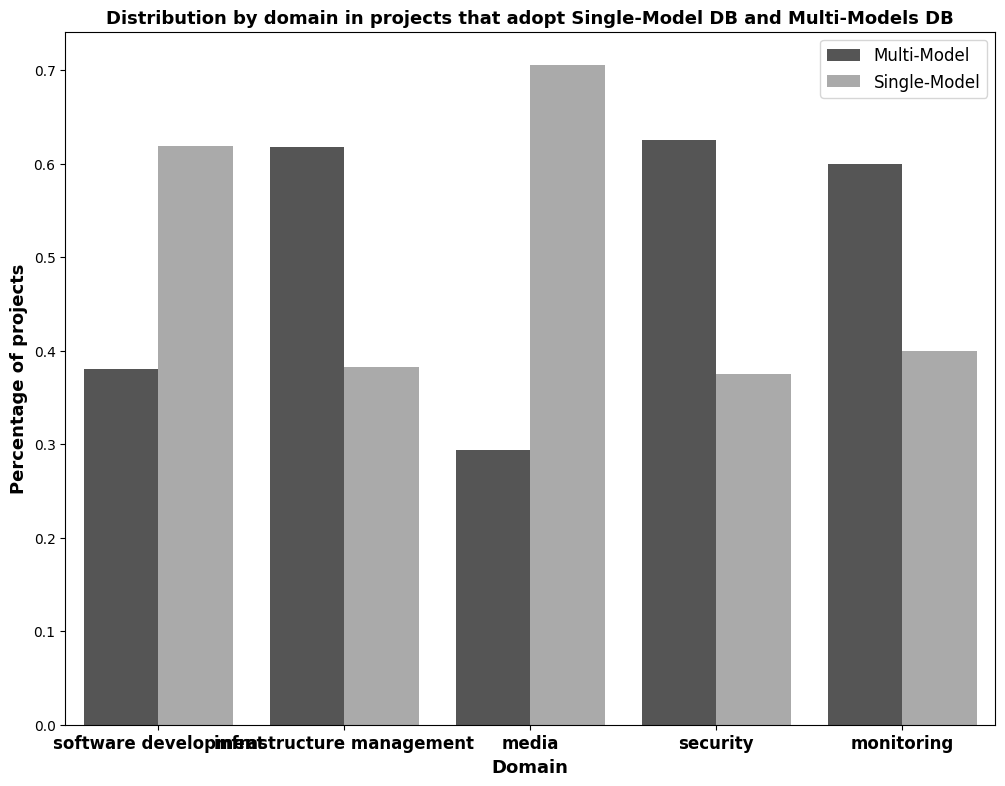

In [23]:
fig = plt.figure(figsize= (12, 9))
graph_most_frequentsMS = sns.barplot(data= most_frequentsMS.melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Domain', y = 'Amount of projects', hue='Model', palette='gray')
graph_most_frequentsMS.set_xticklabels(most_frequentsMS['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_most_frequentsMS.set_xlabel("Domain",fontsize = 13, fontweight = 'bold')
graph_most_frequentsMS.set_ylabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_most_frequentsMS.legend(fontsize = 12)
graph_most_frequentsMS.set_title("Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB", fontsize = 13, fontweight = 'bold')

Text(0.5, 1.0, 'Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB')

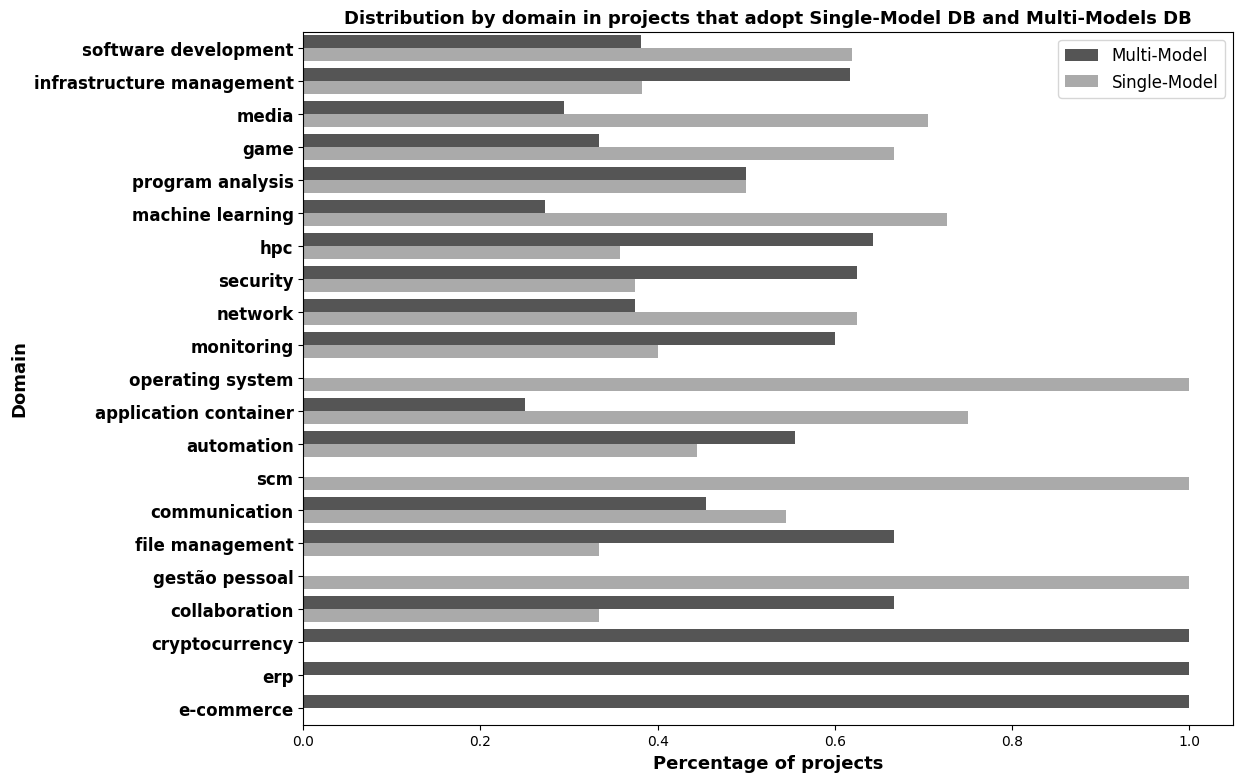

In [24]:
fig = plt.figure(figsize= (12, 9))
graph_multi_model = sns.barplot(data= multi_model.melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Amount of projects', y = 'Domain', hue='Model', palette='gray')
graph_multi_model.set_yticklabels(multi_model['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_multi_model.set_ylabel("Domain",fontsize = 13, fontweight = 'bold')
graph_multi_model.set_xlabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_multi_model.legend(fontsize = 12)
graph_multi_model.set_title("Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB", fontsize = 13, fontweight = 'bold')

In [25]:
soma = table.loc[:].eval('Sum = Relational + NoSQL')
single_model = soma.loc[:].eval('Relational = Relational / Sum')
single_model = single_model.loc[:].eval('NoSQL = NoSQL / Sum')
del single_model['Single-Model']
del single_model['Multi-Model']
del single_model['Sum']
most_frequentsS = pd.DataFrame(data = single_model)
single_model = single_model.dropna()
single_model

,Domain,Relational,NoSQL
0,software development,0.692308,0.307692
1,infrastructure management,0.692308,0.307692
2,media,0.583333,0.416667
3,game,0.833333,0.166667
4,program analysis,0.833333,0.166667
5,machine learning,0.625000,0.375000
6,hpc,0.800000,0.200000
7,security,1.000000,0.000000
8,network,0.400000,0.600000
9,monitoring,0.333333,0.666667


In [26]:
#most_frequentsMS = multi_model.loc['0', '2', '1', '9', '7']
most_frequentsS = most_frequentsS.loc[0:9]
most_frequentsS = most_frequentsS.drop([4, 5, 6, 7, 8], axis = 0)
most_frequentsS

,Domain,Relational,NoSQL
0,software development,0.692308,0.307692
1,infrastructure management,0.692308,0.307692
2,media,0.583333,0.416667
3,game,0.833333,0.166667
9,monitoring,0.333333,0.666667


Text(0.5, 1.0, 'Distribution by domain in projects that adopt only one DB models')

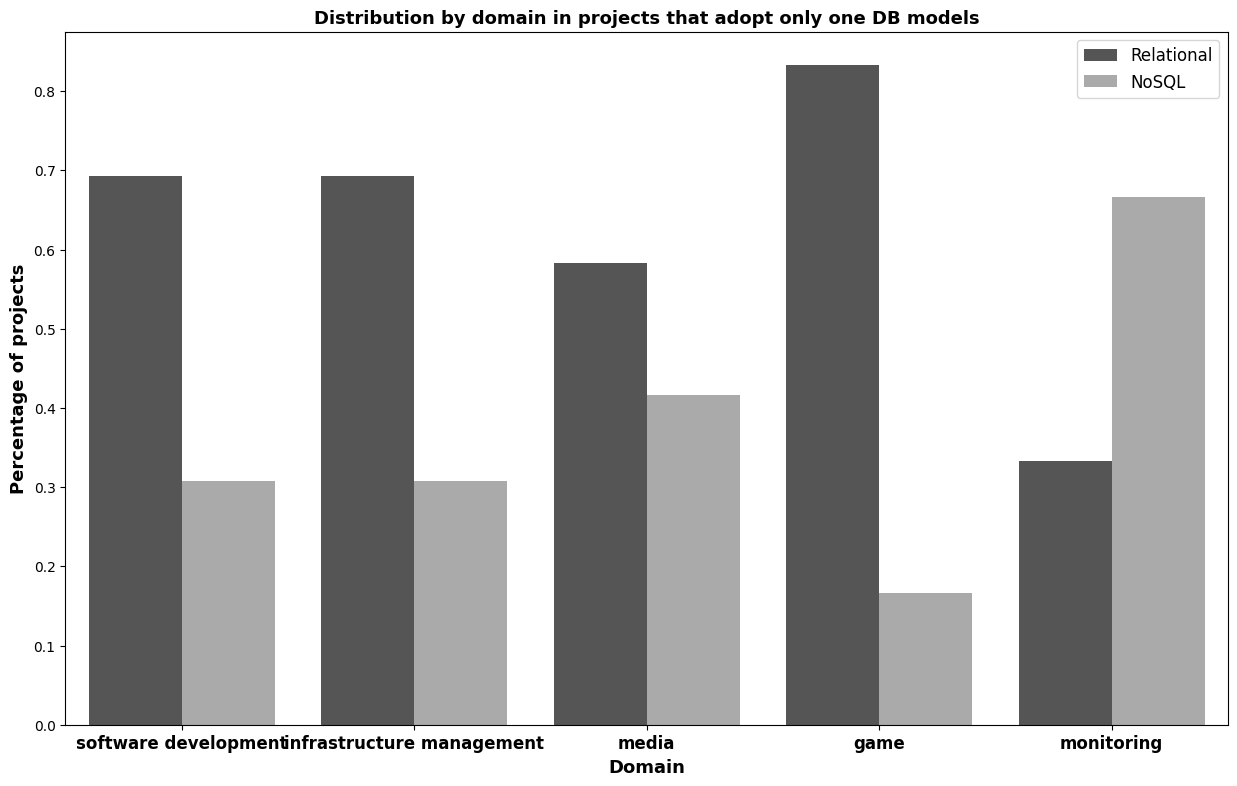

In [27]:
fig = plt.figure(figsize= (15, 9))
graph_most_frequentsS = sns.barplot(data= most_frequentsS.melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Domain', y = 'Amount of projects', hue='Model', palette='gray')
graph_most_frequentsS.set_xticklabels(most_frequentsS['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_most_frequentsS.set_xlabel("Domain",fontsize = 13, fontweight = 'bold')
graph_most_frequentsS.set_ylabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_most_frequentsS.legend(fontsize = 12)
graph_most_frequentsS.set_title("Distribution by domain in projects that adopt only one DB models", fontsize = 13, fontweight = 'bold')

Text(0.5, 1.0, 'Distribution by domain in projects that adopt only one DB models')

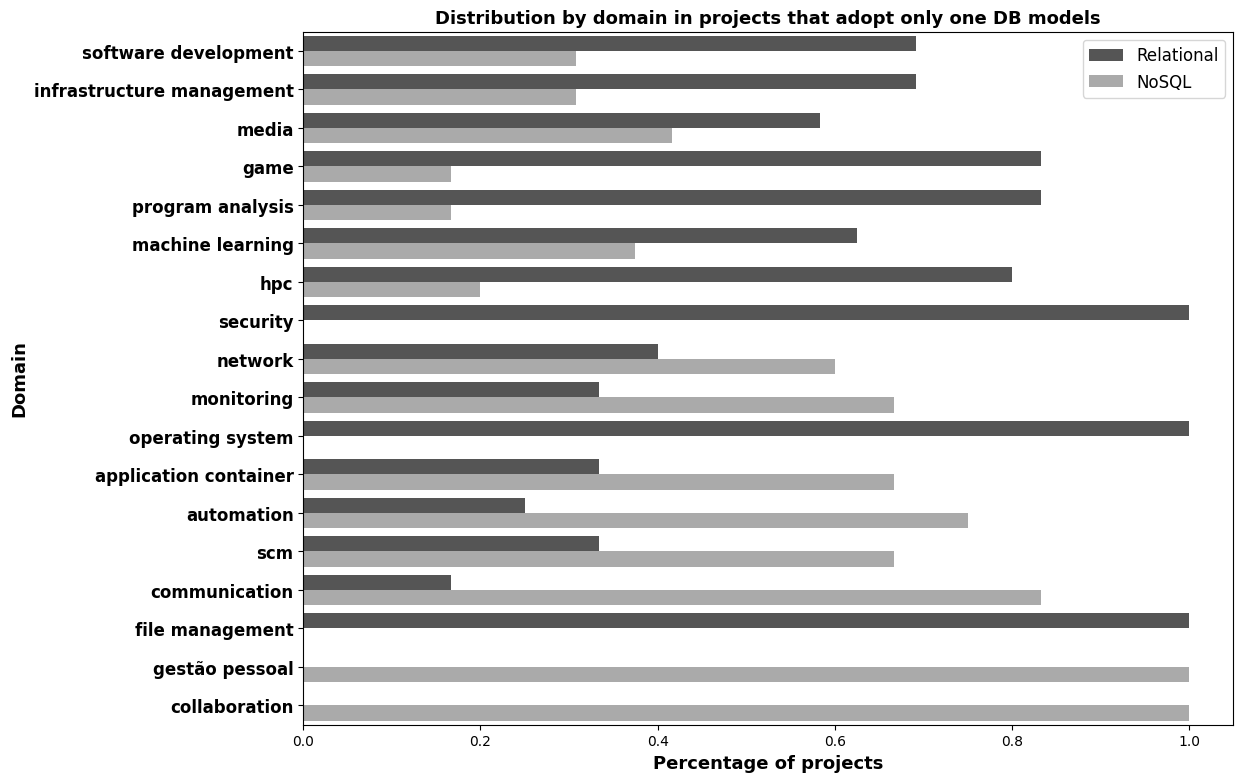

In [28]:
fig = plt.figure(figsize= (12, 9))
graph_single_model = sns.barplot(data= single_model.melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Amount of projects', y = 'Domain', hue='Model', palette='gray')
graph_single_model.set_yticklabels(single_model['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_single_model.set_ylabel("Domain",fontsize = 13, fontweight = 'bold')
graph_single_model.set_xlabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_single_model.legend(fontsize = 12)
graph_single_model.set_title("Distribution by domain in projects that adopt only one DB models", fontsize = 13, fontweight = 'bold')

In [29]:
# fig = plt.figure(figsize= (12, 8))
# x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
# domain_perfil = sns.barplot(data=table.melt(id_vars='Domain',
#                                   value_name='Amount of projects', var_name='Model'),
#             x='Domain', y='Amount of projects', hue='Model', palette='gray')
# domain_perfil.set_yticks(x)
# domain_perfil.set_xticklabels(table['Domain'],rotation = 90, fontsize = 14, fontname = 'Times New Roman', fontweight = 'bold')
# domain_perfil.set_yticklabels(x, fontsize = 12)
# domain_perfil.set_xlabel("Domain",fontsize = 13)
# domain_perfil.set_ylabel("Amount of projects",fontsize = 13)
# domain_perfil.legend(fontsize = 12)
# domain_perfil.set_title("Distribution of projects per Domain", fontsize = 15, fontname = 'Times New Roman', fontweight = 'bold')

Text(0, 0.5, 'Domain')

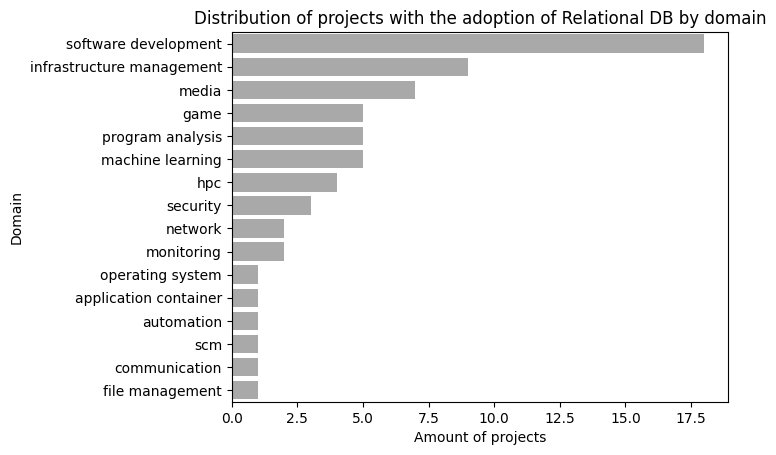

In [30]:
relational = sns.barplot(y=selecaoR['index'], x = selecaoR['domain'], color= 'darkgray')
relational.set_title("Distribution of projects with the adoption of Relational DB by domain")
relational.set_yticklabels(selecaoR['index'])
relational.set_xlabel('Amount of projects')
relational.set_ylabel('Domain')

Text(0, 0.5, 'Domain')

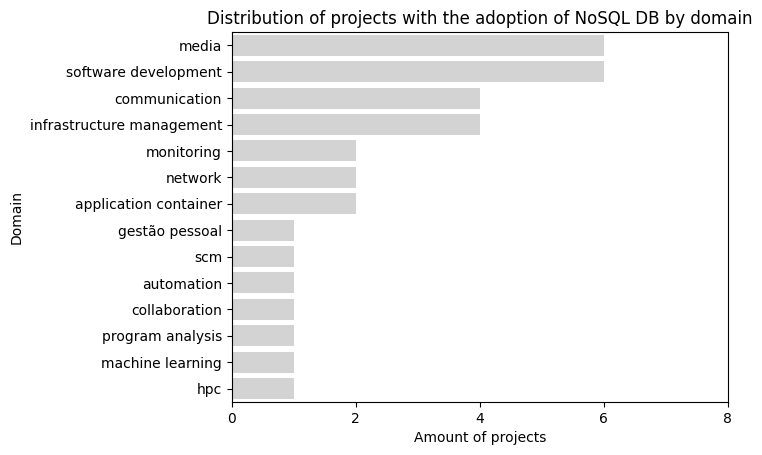

In [31]:
y = [0, 2, 4, 6, 8]
NoSQL = sns.barplot(y = selecaoNR['index'], x = selecaoNR['domain'], color= 'lightgray')
NoSQL.set_title("Distribution of projects with the adoption of NoSQL DB by domain")
NoSQL.set_xticks(y)
NoSQL.set_xlabel('Amount of projects')
NoSQL.set_ylabel('Domain')

Text(0, 0.5, 'Domain')

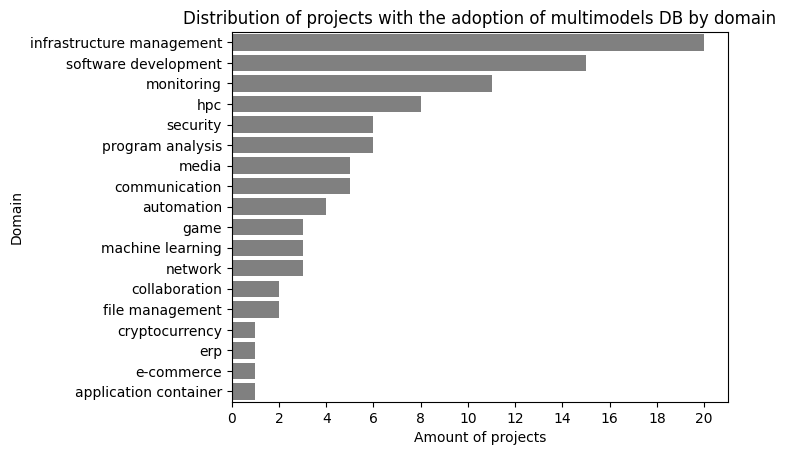

In [32]:
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
multimodel = sns.barplot(x=selecaoM['domain'], y = selecaoM['index'], color= 'gray')
multimodel.set_title("Distribution of projects with the adoption of multimodels DB by domain")
multimodel.set_xticks(x)
multimodel.set_xlabel('Amount of projects')
multimodel.set_ylabel('Domain')